#  In-class Labexercise
## Case-study 1 ( KNN)

### 1.1 Load the libraries:

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 1.2 Read the dataset(PlayTennis.csv):

In [3]:
df_tennis=pd.read_csv('C:/Users/KSK/Downloads/PlayTennis.csv')
df_tennis.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [11]:
df_tennis.Outlook.value_counts()

2    5
1    5
0    4
Name: Outlook, dtype: int64

### 1.3 Use the  LabelEncoder(Concerting categarical to Numarical data)

In [6]:
from sklearn.preprocessing import LabelEncoder

In [9]:
laben=LabelEncoder()
df_tennis['Outlook']=laben.fit_transform(df_tennis['Outlook'])
df_tennis['Temperature']=laben.fit_transform(df_tennis['Temperature'])
df_tennis['Humidity']=laben.fit_transform(df_tennis['Humidity'])
df_tennis['Wind']=laben.fit_transform(df_tennis['Wind'])
df_tennis['Play Tennis']=laben.fit_transform(df_tennis['Play Tennis'])


In [10]:
df_tennis

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


### 1.4 Extract the independent variable X and dependent variable Y?

In [30]:
X=df_tennis.iloc[:,0:4]
y=df_tennis.iloc[:,-1]

### 1.5 Visualize the data:(countplot)

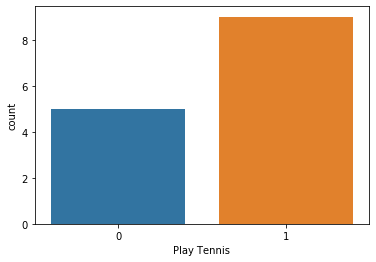

In [32]:
sns.countplot(df_tennis['Play Tennis'])
plt.show()

### 1.6 Split the data into train and test set:(70/30)

In [33]:
from sklearn.model_selection import train_test_split

In [189]:
X_train_k,X_test_k,y_train_k,y_yest_k=train_test_split(X,y,test_size=0.3,random_state=0)

### 1.7 Train a knn

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
knn=KNeighborsClassifier()

In [190]:
knn.fit(X_train_k,y_train_k)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### 1.8 Predict the model:

In [191]:
y_pred_knn=knn.predict(X_test_k)

In [102]:
y_pred_knn

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

### 1.9 Evaluation the model:(classification_report)

In [40]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [103]:
print('classification report',classification_report(y_yest,y_pred))

classification report               precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.67      0.51      0.58        74

    accuracy                           0.76       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231



In [104]:
print('the accuracy score is',accuracy_score(y_yest,y_pred))

the accuracy score is 0.7619047619047619


# Case-study 2  (NB)

### 2.1 Importing the dataset(pima-indians-diabetes.data)

In [45]:
df_diabetes=pd.read_csv('C:/Users/KSK/Downloads/diabetes.csv')
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2.2 Find out the feature columns

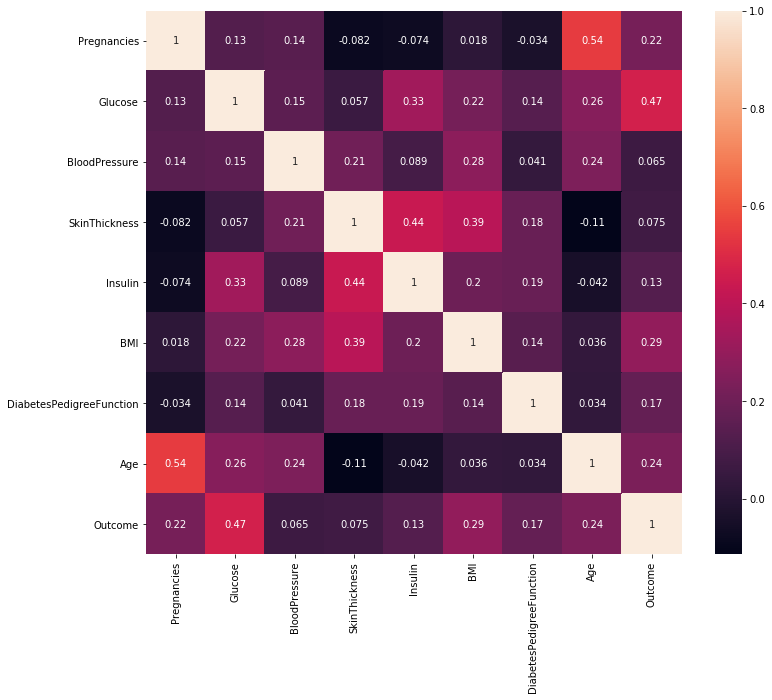

In [59]:
plt.figure(figsize=(12,10))
sns.heatmap(df_diabetes.corr(),annot=True)
plt.show()

In [46]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### 2.3 Extract the independent variable X and dependent variable Y?

In [50]:
X=df_diabetes.iloc[:,0:8]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [51]:
y=df_diabetes.iloc[:,-1]

In [52]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### 2.4 Split the data into train and test set:(70/30)

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### 2.5 Train a GaussianNB?

In [89]:
from sklearn.naive_bayes import GaussianNB

In [90]:
gaunb=GaussianNB()

In [91]:
gaunb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### 2.6 Predict the model:

In [106]:
y_pred_naive=gaunb.predict(X_test)

### 2.7 Evaluation the model:(classification_report)

In [107]:
print('the classification report is:',classification_report(y_yest,y_pred_naive))

the classification report is:               precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.67      0.51      0.58        74

    accuracy                           0.76       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231



In [108]:
print('the accuracy is',accuracy_score(y_yest,y_pred_naive))

the accuracy is 0.7619047619047619


### 2.8 Conclusion:



In [95]:
import sklearn.metrics

### 2.9 Confusion matrix

In [66]:
from sklearn.metrics import confusion_matrix

In [69]:
# this produces a 2x2 numpy array (matrix)
print(confusion_matrix(y_test,y_pred))

[[138  19]
 [ 36  38]]


### 2.10 what is Basic terminology For Confusion matrix?

True Positives (TP): 

True Negatives (TN):

False Positives (FP): 

* Falsely predict positive

Type I error

False Negatives (FN): 


* Falsely predict negative

Type II error

0: negative class

1: positive class

### 2.11 print the first 25 true and predicted responses

In [74]:
print('the true values are',y_yest.values[0:26])
print('the predicted values are',y_pred[0:26])

the true values are [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0]
the predicted values are [1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0]


In [174]:
y_pred_update=gaunb.predict_proba(X_test)

### 2.12 save confusion matrix and slice into four pieces

In [113]:
# confusion matrix for naive bayes
con_mat_naive=confusion_matrix(y_yest,y_pred)

In [139]:
print(con_mat)

[[138  19]
 [ 36  38]]


In [140]:
TN=con_mat[0,0]
print(TN)

138


In [141]:
TP=con_mat[1,1]
print(TP)

38


In [142]:
FP=con_mat[0,1]
print(FP)

19


In [143]:
FN=con_mat[1,0]
print(FN)

36


In [121]:
# the ocnfusion matrix for knn is
con_mat_knn=confusion_matrix(y_yest,y_pred_knn)

In [122]:
print(con_mat_knn)

[[134  23]
 [ 35  39]]


In [144]:
TP1=con_mat_knn[1,1]
print(TP1)
FP1=con_mat_knn[0,1]
print(FP1)
TN1=con_mat_knn[0,0]
print(TN1)
FN1=con_mat_knn[1,0]
print(FN1)

39
23
134
35


### 2.13 Metrics computed from a confusion matrix

Classification Accuracy: Overall, how often is the classifier correct?

In [145]:
print(float(TP+TN)/float(TP+TN+FP+FN))
print('the accuracy is',accuracy_score(y_test,y_pred_naive))

0.7619047619047619
the accuracy is 0.7619047619047619


In [146]:
print(float(TP1+TN1)/float(TP1+TN1+FP1+FN1))
print('the accuracy is',accuracy_score(y_yest,y_pred_knn))

0.7489177489177489
the accuracy is 0.7489177489177489


Classification Error: Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

In [147]:
print('classification error',float((FP+FN)/(TP+FP+TN+FN)))
print(1-accuracy_score(y_yest,y_pred_knn))

classification error 0.23809523809523808
0.25108225108225113


Sensitivity: When the actual value is positive, how often is the prediction correct?



In [148]:
sensitivity=float(TP/TP+FN)
print('sensitivity',sensitivity)

sensitivity 37.0


In [149]:
print('the recall score is',sklearn.metrics.recall_score(y_test,y_pred_naive))

the recall score is 0.5135135135135135


Specificity: When the actual value is negative, how often is the prediction correct?



In [150]:
specificity=TN/(TN+FP)

In [151]:
print('the speciicity is',specificity)

the speciicity is 0.8789808917197452


False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [152]:
false_pos_rate=float(FP/(TN+FP))

In [153]:
print(false_pos_rate)

0.12101910828025478


In [154]:
print('the false positive rate is',1-specificity)

the false positive rate is 0.12101910828025475


Precision: When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

In [155]:
prec=float(TP/(TP+FP))
print(prec)

0.6666666666666666


In [156]:
print('the precision score is',sklearn.metrics.precision_score(y_test,y_pred_naive))

the precision score is 0.6666666666666666


### 2.14 Adjusting the classification threshold?

#### print the first 10 predicted responses?

In [158]:
print(y_pred[:10])

[1 0 0 1 0 0 1 1 1 0]


#### print the first 10 predicted probabilities of class membership

In [198]:
print(y_pred_prob)

[9.96593593e-01 5.97608821e-02 3.44103649e-02 7.31822064e-01
 4.16029529e-02 1.35803574e-02 9.00167662e-01 9.76569104e-01
 8.54246986e-01 4.45270587e-01 7.88920564e-01 9.95456621e-01
 1.80807802e-01 4.94083622e-01 1.71626992e-01 7.00527414e-02
 9.60194405e-01 5.99433123e-03 3.57541431e-01 8.63773036e-02
 5.47694297e-01 1.58886479e-01 4.62023626e-02 9.88109381e-02
 1.39495290e-02 1.03952931e-01 1.21527573e-02 9.96195691e-01
 2.24988469e-02 4.26528634e-02 4.52602145e-01 1.17956356e-01
 6.07849256e-02 3.32214571e-01 1.64315026e-02 6.90324885e-01
 7.38132952e-01 2.78569529e-02 1.33329745e-01 6.91332886e-01
 1.06452427e-01 7.17907561e-02 5.00548315e-02 8.78492313e-01
 9.99917159e-01 3.15517512e-04 1.92821106e-02 7.31503113e-02
 2.41043002e-01 1.25697850e-01 3.71561787e-01 3.82383017e-02
 9.91600833e-01 5.40583136e-01 1.29361474e-01 2.49136809e-02
 2.49433370e-02 3.01171849e-01 8.36986466e-02 3.41419179e-03
 9.80819015e-01 6.89075588e-01 2.74319337e-02 3.92332821e-01
 6.95402023e-01 9.896726

#### print the first 10 predicted probabilities for class 1

In [161]:
gaunb.predict_proba(X_test)[:10,1]

array([0.99659359, 0.05976088, 0.03441036, 0.73182206, 0.04160295,
       0.01358036, 0.90016766, 0.9765691 , 0.85424699, 0.44527059])

#### store the predicted probabilities for class 1

In [162]:
y_pred_prob_1=gaunb.predict_proba(X_test)[:10,1]

#### plot histogram of predicted probabilities

#### create 8 bins

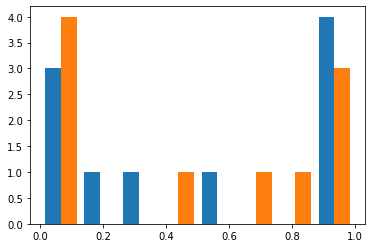

In [164]:
plt.hist(y_pred_prob,bins=8)
plt.show()

### print the first 10 predicted probabilities

### create new confusion matrix 

In [192]:
y_pred_prob_k=knn.predict_proba(X_test_k)

### 2.14 Receiver Operating Characteristic (ROC) Curves

In [201]:
y_pred_prob=gaunb.predict_proba(X_test)[:,1]

In [206]:
fpr,tpr,thresholds=sklearn.metrics.roc_curve(y_yest,y_pred_prob)

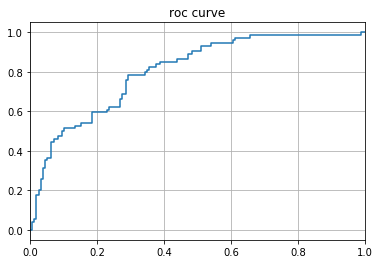

In [219]:
plt.plot(fpr,tpr)

plt.xlim([0,1])
plt.grid(True)
plt.title('roc curve')
plt.show()

#### define a function that accepts a threshold and prints sensitivity and specificity

In [214]:
def evaluate_threshold(threshold):
    print('sensitivity',tpr[thresholds>threshold][-1])
    print('specificity',1-fpr[thresholds>threshold][-1])

In [220]:
thresholds

array([1.99997887e+00, 9.99978873e-01, 9.98718429e-01, 9.97274119e-01,
       9.96593593e-01, 9.96195691e-01, 9.76067499e-01, 9.72811513e-01,
       9.60194405e-01, 9.50525185e-01, 9.12520110e-01, 9.06675962e-01,
       8.72821642e-01, 8.54246986e-01, 8.06016292e-01, 7.99126230e-01,
       7.88920564e-01, 7.74252970e-01, 6.95402023e-01, 6.91332886e-01,
       6.90324885e-01, 6.76862833e-01, 6.39105783e-01, 6.10434118e-01,
       5.47694297e-01, 5.40583136e-01, 5.39337241e-01, 4.86855162e-01,
       4.76532039e-01, 4.61357781e-01, 4.59081078e-01, 4.45270587e-01,
       3.78242825e-01, 3.32090248e-01, 3.01501230e-01, 3.01175815e-01,
       3.01171849e-01, 2.65045765e-01, 2.46760132e-01, 2.41903806e-01,
       2.40663215e-01, 2.21057897e-01, 2.02270071e-01, 1.97187645e-01,
       1.91897658e-01, 1.62799114e-01, 1.58886479e-01, 1.55600585e-01,
       1.47289540e-01, 1.39991768e-01, 1.38939279e-01, 1.29361474e-01,
       1.25697850e-01, 1.24184359e-01, 1.20847041e-01, 1.02144391e-01,
      

In [215]:
evaluate_threshold(0.5)

sensitivity 0.5135135135135135
specificity 0.8980891719745223


In [216]:
evaluate_threshold(0.3)

sensitivity 0.6216216216216216
specificity 0.7643312101910829


# 3. What is advantages Confusion matrix and ROC/AUC?